In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**Loading the Data**

In [ ]:
df=pd.read_csv("stock_data.csv")
df.head()

,Date,Company,Sector,Open,High,Low,Close,Volume,Market_Cap,PE_Ratio,Dividend_Yield,Volatility,Sentiment_Score,Trend
0,2022-01-01,Uber,Technology,100.000000,101.036120,97.477809,100.000000,171958,515658508724,24.253218,0.163090,0.047484,0.939232,Bearish
1,2022-01-02,Tesla,Automotive,100.071106,102.037960,97.152675,100.071106,196867,975565774367,18.602848,0.288515,0.022472,0.469417,Bearish
2,2022-01-03,Panasonic,Finance,99.857828,101.517497,98.108097,99.857828,181932,459529999029,10.728933,2.221827,0.019991,0.399193,Bullish
3,2022-01-04,Tencent,Automotive,98.851663,101.303783,96.998218,98.851663,153694,557748063521,14.582696,1.377740,0.036166,0.705853,Stable
4,2022-01-05,Wells Fargo,Automotive,98.391118,99.990486,96.230707,98.391118,169879,860771385873,37.491114,3.110198,0.034770,-0.768354,Stable


**Data Preprocessing**

In [ ]:
df.isna().sum()

,0
Date,0
Company,0
Sector,0
Open,0
High,0
Low,0
Close,0
Volume,0
Market_Cap,0
PE_Ratio,0


In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1000 non-null   object 
 1   Company          1000 non-null   object 
 2   Sector           1000 non-null   object 
 3   Open             1000 non-null   float64
 4   High             1000 non-null   float64
 5   Low              1000 non-null   float64
 6   Close            1000 non-null   float64
 7   Volume           1000 non-null   int64  
 8   Market_Cap       1000 non-null   int64  
 9   PE_Ratio         1000 non-null   float64
 10  Dividend_Yield   1000 non-null   float64
 11  Volatility       1000 non-null   float64
 12  Sentiment_Score  1000 non-null   float64
 13  Trend            1000 non-null   object 
dtypes: float64(8), int64(2), object(4)
memory usage: 109.5+ KB


In [ ]:
#converting the 'Date' column into "datetime" dtype
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1000 non-null   datetime64[ns]
 1   Company          1000 non-null   object        
 2   Sector           1000 non-null   object        
 3   Open             1000 non-null   float64       
 4   High             1000 non-null   float64       
 5   Low              1000 non-null   float64       
 6   Close            1000 non-null   float64       
 7   Volume           1000 non-null   int64         
 8   Market_Cap       1000 non-null   int64         
 9   PE_Ratio         1000 non-null   float64       
 10  Dividend_Yield   1000 non-null   float64       
 11  Volatility       1000 non-null   float64       
 12  Sentiment_Score  1000 non-null   float64       
 13  Trend            1000 non-null   object        
dtypes: datetime64[ns](1), float64(8), int64(2

In [ ]:
#making the Date column as index
df.set_index('Date',inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2022-01-01 to 2024-09-26
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1000 non-null   object 
 1   Sector           1000 non-null   object 
 2   Open             1000 non-null   float64
 3   High             1000 non-null   float64
 4   Low              1000 non-null   float64
 5   Close            1000 non-null   float64
 6   Volume           1000 non-null   int64  
 7   Market_Cap       1000 non-null   int64  
 8   PE_Ratio         1000 non-null   float64
 9   Dividend_Yield   1000 non-null   float64
 10  Volatility       1000 non-null   float64
 11  Sentiment_Score  1000 non-null   float64
 12  Trend            1000 non-null   object 
dtypes: float64(8), int64(2), object(3)
memory usage: 109.4+ KB


In [ ]:
df.head()

,Company,Sector,Open,High,Low,Close,Volume,Market_Cap,PE_Ratio,Dividend_Yield,Volatility,Sentiment_Score,Trend
Date,,,,,,,,,,,,,
2022-01-01,Uber,Technology,100.000000,101.036120,97.477809,100.000000,171958,515658508724,24.253218,0.163090,0.047484,0.939232,Bearish
2022-01-02,Tesla,Automotive,100.071106,102.037960,97.152675,100.071106,196867,975565774367,18.602848,0.288515,0.022472,0.469417,Bearish
2022-01-03,Panasonic,Finance,99.857828,101.517497,98.108097,99.857828,181932,459529999029,10.728933,2.221827,0.019991,0.399193,Bullish
2022-01-04,Tencent,Automotive,98.851663,101.303783,96.998218,98.851663,153694,557748063521,14.582696,1.377740,0.036166,0.705853,Stable
2022-01-05,Wells Fargo,Automotive,98.391118,99.990486,96.230707,98.391118,169879,860771385873,37.491114,3.110198,0.034770,-0.768354,Stable


In [ ]:
#sorting indexes
df.sort_index(inplace=True)

In [ ]:
#Data normalization
scaler=MinMaxScaler()

# Select only numerical features for scaling
numerical_features = df.select_dtypes(include=np.number).columns
# Apply MinMaxScaler to numerical features only
scaler_values=scaler.fit_transform(df[numerical_features])

In [ ]:
scaler_values

array([[0.37984075, 0.36312155, 0.37591266, ..., 0.03067534, 0.93933058,
        0.97047707],
       [0.38136169, 0.38359756, 0.36896731, ..., 0.05582255, 0.31241655,
        0.73485648],
       [0.37679972, 0.37296013, 0.38937653, ..., 0.44344418, 0.25022714,
        0.69963783],
       ...,
       [0.82128998, 0.80151359, 0.81718152, ..., 0.07473468, 0.95307554,
        0.24746964],
       [0.81253095, 0.81457836, 0.81342145, ..., 0.41978147, 0.21025012,
        0.91089744],
       [0.81957863, 0.82632459, 0.80635866, ..., 0.60115125, 0.26140221,
        0.15280177]])

In [ ]:
df_scaled = pd.DataFrame(scaler_values, columns=numerical_features, index=df.index)
# Use numerical_features for columns, ensuring it matches the data shape

In [ ]:
df_scaled.head()

,Open,High,Low,Close,Volume,Market_Cap,PE_Ratio,Dividend_Yield,Volatility,Sentiment_Score
Date,,,,,,,,,,
2022-01-01,0.379841,0.363122,0.375913,0.379841,0.813716,0.515392,0.550165,0.030675,0.939331,0.970477
2022-01-02,0.381362,0.383598,0.368967,0.381362,0.980083,0.976167,0.388649,0.055823,0.312417,0.734856
2022-01-03,0.376800,0.372960,0.389377,0.376800,0.880332,0.459157,0.163573,0.443444,0.250227,0.699638
2022-01-04,0.355278,0.368592,0.365668,0.355278,0.691731,0.557561,0.273733,0.274208,0.655655,0.853433
2022-01-05,0.345427,0.341750,0.349273,0.345427,0.799830,0.861156,0.928570,0.621559,0.620644,0.114092


**Plotting the** **columns**

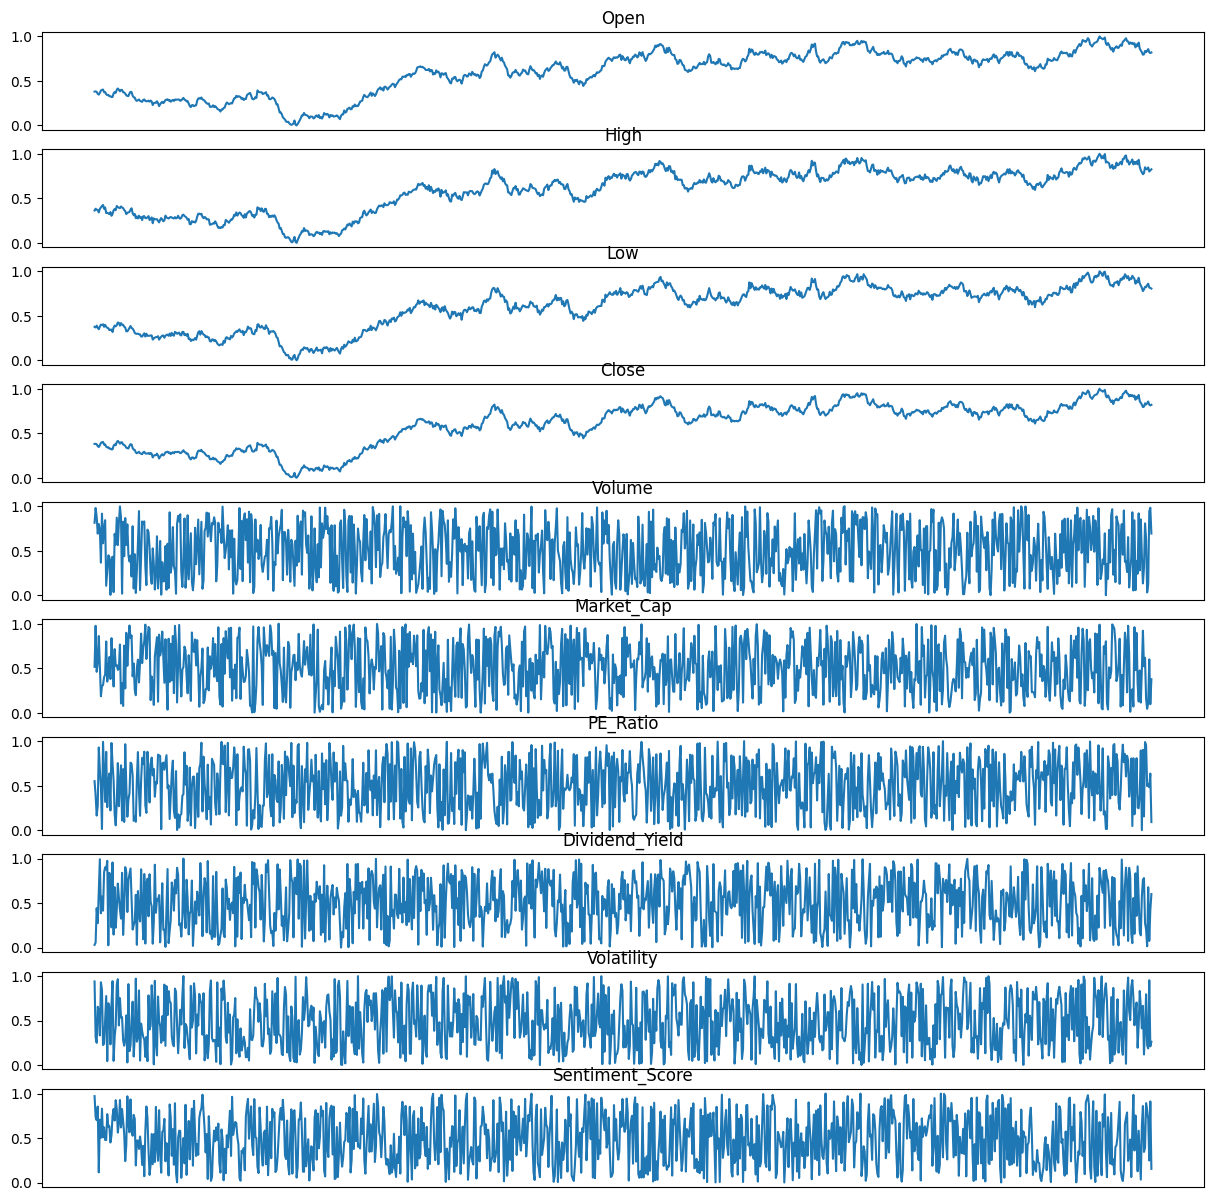

In [ ]:
plt.rcParams['figure.figsize'] = (15, 15)
figure, axes = plt.subplots(10)

for ax, col in zip(axes, df_scaled.columns):
  ax.plot(df_scaled[col])
  ax.set_title(col)
  ax.axes.xaxis.set_visible(False)

**Creating Slide Window Sequence**

In [ ]:
##1,2,3.....10
#window_size=3 (time step)
#[1,2,3] --> [4]
#[2,3,4] --> [5]
#[3,4,5] --> [6]


In [ ]:
def create_sequences(data, window_size):
  X=[]
  y=[]
  for i in range(window_size, len(data)):
      X.append(data[i-window_size:i].values)
      # Use iloc to access rows by integer position
      y.append(data.iloc[i].values)
  return np.array(X), np.array(y)

In [ ]:
window_size = 60
X, y = create_sequences(df_scaled, window_size)

In [ ]:
X.shape, y.shape

((940, 60, 10), (940, 10))

**Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((752, 60, 10), (188, 60, 10))